# Sales Company EDA ⭐

---



## Import some useful stuff

---

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Data overview

---



### Events

In [ ]:
events = pd.read_csv('events.csv')

In [ ]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        1330 non-null   int64  
 1   Order Date      1330 non-null   object 
 2   Ship Date       1330 non-null   object 
 3   Order Priority  1330 non-null   object 
 4   Country Code    1248 non-null   object 
 5   Product ID      1330 non-null   int64  
 6   Sales Channel   1330 non-null   object 
 7   Units Sold      1328 non-null   float64
 8   Unit Price      1330 non-null   float64
 9   Unit Cost       1330 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 104.0+ KB


In [ ]:
events.head()

,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost
0,100640618,10/8/2014,10/18/2014,M,NOR,2103,Online,650.0,205.70,117.11
1,100983083,8/11/2016,8/11/2016,C,SRB,2103,Offline,1993.0,205.70,117.11
2,101025998,7/18/2014,8/11/2014,M,NaN,7940,Online,4693.0,668.27,502.54
3,102230632,5/13/2017,6/13/2017,L,MNE,2455,Online,1171.0,109.28,35.84
4,103435266,8/11/2012,9/18/2012,H,SRB,1270,Offline,7648.0,47.45,31.79


### Products

In [ ]:
products = pd.read_csv('products.csv')

In [ ]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         12 non-null     int64 
 1   item_type  12 non-null     object
dtypes: int64(1), object(1)
memory usage: 324.0+ bytes


In [ ]:
products

,id,item_type
0,2103,Cereal
1,7940,Household
2,2455,Clothes
3,1270,Beverages
4,8681,Office Supplies
5,4594,Fruits
6,5988,Vegetables
7,7331,Baby Food
8,8875,Meat
9,8293,Cosmetics


### Countries

In [ ]:
countries = pd.read_csv('countries.csv')

In [ ]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        249 non-null    object
 1   alpha-2     248 non-null    object
 2   alpha-3     249 non-null    object
 3   region      248 non-null    object
 4   sub-region  248 non-null    object
dtypes: object(5)
memory usage: 9.9+ KB


In [ ]:
countries.head()

,name,alpha-2,alpha-3,region,sub-region
0,Afghanistan,AF,AFG,Asia,Southern Asia
1,Åland Islands,AX,ALA,Europe,Northern Europe
2,Albania,AL,ALB,Europe,Southern Europe
3,Algeria,DZ,DZA,Africa,Northern Africa
4,American Samoa,AS,ASM,Oceania,Polynesia


### Сhecking if all the IDs are distinct

In [ ]:
events['Order ID'].is_unique  # True?

True

In [ ]:
products['id'].is_unique  # True?

True

In [ ]:
countries['alpha-3'].is_unique  # True?

True

### Column Descriptions

#### Events Table
| Column Name     | Type    | Missing | Description |
|-----------------|---------|---------|-------------|
| 🔑 Order ID      | int64   | 0       | Unique identifier for each order |
| Order Date      | object  | 0       | Order creation date |
| Ship Date       | object  | 0       | Date when the order was shipped |
| Order Priority  | object  | 0       | Order fulfillment priority (C – Critical, H – High, M – Medium, L – Low) |
| 🔗 Country Code  | object  | 82      | Country code for origin of order |
| 🔗 Product ID    | int64   | 0       | Product identifier |
| Sales Channel   | object  | 0       | Sales channel (Online / Offline) |
| Units Sold      | float64 | 2       | Quantity of units sold |
| Unit Price      | float64 | 0       | Selling price per unit |
| Unit Cost       | float64 | 0       | Cost per unit |

#### Products Table
| Column Name | Type   | Description |
|-------------|--------|-------------|
| 🔑 id        | int64  | Unique product ID |
| item_type   | object | Product category/type |

#### Countries Table
| Column Name  | Type   | Missing | Description |
|--------------|--------|---------|-------------|
| name         | object | 0       | Full country name |
| alpha-2      | object | 1       | ISO 2-letter country code |
| 🔑 alpha-3   | object | 0       | ISO 3-letter country code |
| region       | object | 1       | Region (e.g., Asia) |
| sub-region   | object | 1       | Subregion (e.g., Polynesia) |

### Simple ER Diagram: Table Connections

The following diagram illustrates how the main events table is connected to the countries and products tables via foreign keys.

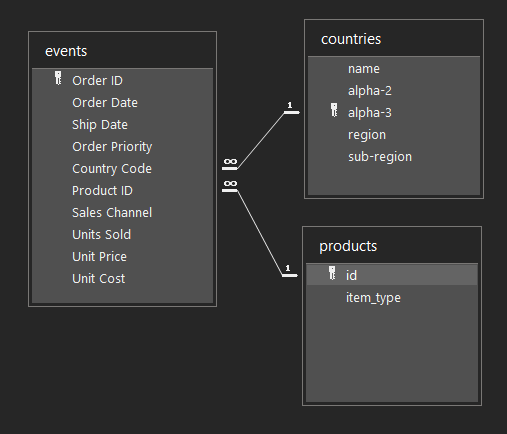

## Data cleaning

---



### Functions for checking outliers

In [ ]:
def detect_outliers_iqr(df, column):
    '''
    Detects outliers in a specified column of a DataFrame using
    the Interquartile Range (IQR) method.
    ------------------------------------------------------------
    Parameters:
    df : pandas.DataFrame
    column : str
    ------------------------------------------------------------
    Returns:
    Returns:
    pandas.DataFrame: A DataFrame containing rows where the
    values in the specified column are outliers
    '''
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

In [ ]:
def check_and_show(df, condition):
    '''
    Check a condition on a DataFrame and return result or print
    'Condition applied. Number of matching rows: 0'.
    ------------------------------------------------------------
    Parameters:
    df : pandas.DataFrame
    condition : pandas.Series
    ------------------------------------------------------------
    Returns:
    (str + pandas.DataFrame) or str

    If True, Prints the result of the condition check and the
    number of matching rows.
    Returns the filtered DataFrame if the condition matches any rows.

    If False, Prints the result of the condition check and the
    number of matching rows.
    '''
    result = df[condition]
    if result.empty:
        print(f'Condition applied. Number of matching rows: {len(result)}')
    else:
        print(f'Condition applied. Number of matching rows: {len(result)}')
        return result

### Checking outliers

In [ ]:
outliers_price_iqr = detect_outliers_iqr(events, 'Unit Price')
outliers_cost_iqr = detect_outliers_iqr(events, 'Unit Cost')
outliers_sold_iqr = detect_outliers_iqr(events, 'Units Sold')
print(f'Outliers in "Unit Price" (IQR): {outliers_price_iqr.shape[0]}')
print(f'Outliers in "Unit Cost" (IQR): {outliers_cost_iqr.shape[0]}')
print(f'Outliers in "Units Sold" (IQR): {outliers_sold_iqr.shape[0]}')

Outliers in "Unit Price" (IQR): 0
Outliers in "Unit Cost" (IQR): 0
Outliers in "Units Sold" (IQR): 0


In [ ]:
check_and_show(events, events['Units Sold'] <= 0)

Condition applied. Number of matching rows: 0


In [ ]:
check_and_show(events, events['Unit Price'] <= events['Unit Cost'])

Condition applied. Number of matching rows: 0


In [ ]:
events.loc[:, 'Order Date'] = pd.to_datetime(events['Order Date'])
events.loc[:, 'Ship Date'] = pd.to_datetime(events['Ship Date'])

In [ ]:
check_and_show(events, events['Order Date'] > events['Ship Date'])

Condition applied. Number of matching rows: 0


### Missing values

In [ ]:
print((events.isnull().mean() * 100).round(2).map(lambda x: f'{x}%'))

Order ID           0.0%
Order Date         0.0%
Ship Date          0.0%
Order Priority     0.0%
Country Code      6.17%
Product ID         0.0%
Sales Channel      0.0%
Units Sold        0.15%
Unit Price         0.0%
Unit Cost          0.0%
dtype: object


In [ ]:
events['Country Code'] = events['Country Code'].fillna('Other')

In [ ]:
events = events.dropna(subset='Units Sold')

In [ ]:
print((countries.isnull().mean() * 100).round(2).map(lambda x: f'{x}%'))

name          0.0%
alpha-2       0.4%
alpha-3       0.0%
region        0.4%
sub-region    0.4%
dtype: object


In [ ]:
countries[countries.isna().any(axis=1)]

,name,alpha-2,alpha-3,region,sub-region
8,Antarctica,AQ,ATA,NaN,NaN
153,Namibia,NaN,NAM,Africa,Sub-Saharan Africa


In [ ]:
countries.loc[countries['alpha-3'] == 'ATA', ['region', 'sub-region']] = ['Antarctica', 'Antarctica']
countries.loc[countries['alpha-3'] == 'NAM', 'alpha-2'] = 'NA'

### Text processing

In [ ]:
events.nunique()

,0
Order ID,1328
Order Date,1049
Ship Date,1069
Order Priority,6
Country Code,46
Product ID,12
Sales Channel,3
Units Sold,1239
Unit Price,12
Unit Cost,12


In [ ]:
events['Order Priority'].unique()

array(['M', 'C', 'L', 'H', ' C', 'M '], dtype=object)

In [ ]:
events.loc[:, 'Order Priority'] = events['Order Priority'].str.strip()
events['Order Priority'].unique()

array(['M', 'C', 'L', 'H'], dtype=object)

In [ ]:
events['Sales Channel'].unique()

array(['Online', 'Offline', 'online'], dtype=object)

In [ ]:
events.loc[:, 'Sales Channel'] = events['Sales Channel'].str.capitalize()
events['Sales Channel'].unique()

array(['Online', 'Offline'], dtype=object)

In [ ]:
products['item_type'].unique()

array(['Cereal', 'Household', 'Clothes', 'Beverages', 'Office Supplies',
       'Fruits', 'Vegetables', 'Baby Food', 'Meat', 'Cosmetics', 'Snacks',
       'Personal Care'], dtype=object)

In [ ]:
countries['region'].value_counts()

,count
region,
Africa,60
Americas,57
Europe,51
Asia,51
Oceania,29
Antarctica,1


In [ ]:
countries['sub-region'].value_counts()

,count
sub-region,
Sub-Saharan Africa,53
Latin America and the Caribbean,52
Western Asia,18
Northern Europe,16
Southern Europe,16
South-eastern Asia,11
Eastern Europe,10
Polynesia,10
Southern Asia,9


### Verifying ID consistency and detecting Cyrillic characters

In [ ]:
country_check = events['Country Code'].str.contains(r'[а-яА-ЯїЇєЄіІґҐ]', na=False).sum()
print(f'The column "country code" contains {country_check} value(s) with Cyrillic characters.')

The column "country code" contains 0 value(s) with Cyrillic characters.


In [ ]:
cols_to_check = countries.loc[:, 'name':'sub-region']

for col in cols_to_check:
    count = countries[col].astype(str).str.contains(r'[а-яА-ЯїЇєЄіІґҐ]', na=False).sum()
    print(f'The column "{col}"" contains {count} value(s) with Cyrillic characters.')

The column "name"" contains 0 value(s) with Cyrillic characters.
The column "alpha-2"" contains 0 value(s) with Cyrillic characters.
The column "alpha-3"" contains 0 value(s) with Cyrillic characters.
The column "region"" contains 0 value(s) with Cyrillic characters.
The column "sub-region"" contains 0 value(s) with Cyrillic characters.


In [ ]:
codes = events['Country Code'].astype(str)
count_len_3 = (codes.str.len() == 3).sum()
count_upper = codes.str.isupper().sum()

print(f'Length 3 values: {count_len_3}\nUppercase values: {count_upper}')

Length 3 values: 1246
Uppercase values: 1246


In [ ]:
alpha3 = countries['alpha-3'].astype(str)
count_len_3 = (alpha3.str.len() == 3).sum()
count_upper = alpha3.str.isupper().sum()

print(f'Length 3 values: {count_len_3}\nUppercase values: {count_upper}')

Length 3 values: 249
Uppercase values: 249


In [ ]:
events['Product ID'].unique()

array([2103, 7940, 2455, 1270, 8681, 4594, 5988, 7331, 8875, 8293, 8969,
       3127])

In [ ]:
products['id'].unique()

array([2103, 7940, 2455, 1270, 8681, 4594, 5988, 7331, 8875, 8293, 8969,
       3127])

### Duplicate detection

In [ ]:
events.duplicated().sum()

np.int64(0)

In [ ]:
countries.duplicated().sum()

np.int64(0)

### Renaming

In [ ]:
products.rename(columns={'item_type': 'product_type'}, inplace=True)

In [ ]:
countries.rename(columns={'name': 'country_name'}, inplace=True)

In [ ]:
events.columns = events.columns.str.replace(' ', '_').str.lower()

### Data Preparation Summary

In this step, I prepared the dataset for analysis by performing data cleaning and validation:

- Events Table:

 - Replaced 82 missing Country Code values with "Other."

 - Removed 2 rows with missing Units Sold values.

 - Cleaned and standardized columns (Order Priority, Sales Channel) for consistency.

 - Validated Country Code values to ensure uppercase and correct length.

 - Renamed columns for clarity.

- Products Table:

 - Validated all values and renamed columns for clarity.

- Countries Table:

 - Filled missing values in Region and Sub-Region columns.

 - Applied validation to the Country Code field.


Possible reasons include: privacy policies, data entry errors, incomplete sources, placeholder entries, or formatting issues that prevented successful data merging.

## Creating main dataframe

---



### Merge

In [ ]:
df = events.merge(products, how='inner', left_on='product_id', right_on='id') \
           .merge(countries, how='left', left_on='country_code', right_on='alpha-3')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1328 entries, 0 to 1327
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        1328 non-null   int64  
 1   order_date      1328 non-null   object 
 2   ship_date       1328 non-null   object 
 3   order_priority  1328 non-null   object 
 4   country_code    1328 non-null   object 
 5   product_id      1328 non-null   int64  
 6   sales_channel   1328 non-null   object 
 7   units_sold      1328 non-null   float64
 8   unit_price      1328 non-null   float64
 9   unit_cost       1328 non-null   float64
 10  id              1328 non-null   int64  
 11  product_type    1328 non-null   object 
 12  country_name    1246 non-null   object 
 13  alpha-2         1246 non-null   object 
 14  alpha-3         1246 non-null   object 
 15  region          1246 non-null   object 
 16  sub-region      1246 non-null   object 
dtypes: float64(3), int64(3), object(1

In [ ]:
df.fillna('Other', inplace=True)

In [ ]:
df.describe()

,order_id,product_id,units_sold,unit_price,unit_cost,id
count,1.328000e+03,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000
mean,5.416231e+08,5787.775602,4952.201807,264.913245,187.211521,5787.775602
std,2.573496e+08,2820.635702,2905.198996,217.386320,176.187801,2820.635702
min,1.006406e+08,1270.000000,2.000000,9.330000,6.920000,1270.000000
25%,3.213291e+08,3127.000000,2356.750000,81.730000,35.840000,3127.000000
50%,5.399925e+08,5988.000000,4962.000000,154.060000,97.440000,5988.000000
75%,7.547357e+08,8681.000000,7459.500000,437.200000,263.330000,8681.000000
max,9.998797e+08,8969.000000,9999.000000,668.270000,524.960000,8969.000000


In [ ]:
df.drop(columns=['country_code', 'id', 'alpha-2', 'alpha-3'], inplace=True)

### Data type optimization

In [ ]:
category = ['order_priority', 'sales_channel', 'product_type']

for col in category:
    df[col] = df[col].astype('category')

In [ ]:
df = df.assign(
    units_sold  = df['units_sold'].astype('float32'),
    unit_price  = df['unit_price'].astype('float32'),
    unit_cost   = df['unit_cost'].astype('float32'),
    product_id  = df['product_id'].astype('uint32'),
    order_id    = df['order_id'].astype('uint32'),
    order_date  = pd.to_datetime(df['order_date']),
    ship_date   = pd.to_datetime(df['ship_date'])
    )

### Creating derived columns

In [ ]:
df['total_revenue'] = df['units_sold'] * df['unit_price']
df['total_cost'] = df['units_sold'] * df['unit_cost']
df['total_profit'] = df['total_revenue'] - df['total_cost']
df['shipping_time'] = (df['ship_date'] - df['order_date'])

In [ ]:
df['shipping_time'] = df['shipping_time'].dt.days

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1328 entries, 0 to 1327
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        1328 non-null   uint32        
 1   order_date      1328 non-null   datetime64[ns]
 2   ship_date       1328 non-null   datetime64[ns]
 3   order_priority  1328 non-null   category      
 4   product_id      1328 non-null   uint32        
 5   sales_channel   1328 non-null   category      
 6   units_sold      1328 non-null   float32       
 7   unit_price      1328 non-null   float32       
 8   unit_cost       1328 non-null   float32       
 9   product_type    1328 non-null   category      
 10  country_name    1328 non-null   object        
 11  region          1328 non-null   object        
 12  sub-region      1328 non-null   object        
 13  total_revenue   1328 non-null   float32       
 14  total_cost      1328 non-null   float32       
 15  tota

In [ ]:
df.describe()

,order_id,order_date,ship_date,product_id,units_sold,unit_price,unit_cost,total_revenue,total_cost,total_profit,shipping_time
count,1.328000e+03,1328,1328,1328.000000,1328.000000,1328.000000,1328.000000,1.328000e+03,1.328000e+03,1.328000e+03,1328.000000
mean,5.416231e+08,2013-10-11 22:28:54.939759104,2013-11-05 17:22:02.891566336,5787.775602,4952.201660,264.913269,187.211533,1.281724e+06,9.041378e+05,3.775862e+05,24.786898
min,1.006406e+08,2010-01-01 00:00:00,2010-01-10 00:00:00,1270.000000,2.000000,9.330000,6.920000,5.038200e+02,3.736800e+02,1.301400e+02,0.000000
25%,3.213291e+08,2011-12-14 06:00:00,2012-01-02 00:00:00,3127.000000,2356.750000,81.730003,35.840000,2.664105e+05,1.576069e+05,8.491285e+04,12.000000
50%,5.399925e+08,2013-10-15 12:00:00,2013-11-05 12:00:00,5988.000000,4962.000000,154.059998,97.440002,7.613049e+05,4.332233e+05,2.748680e+05,25.000000
75%,7.547357e+08,2015-08-29 12:00:00,2015-10-04 18:00:00,8681.000000,7459.500000,437.200012,263.329987,1.743177e+06,1.108768e+06,5.477365e+05,37.000000
max,9.998797e+08,2017-07-23 00:00:00,2017-08-31 00:00:00,8969.000000,9999.000000,668.270020,524.960022,6.672676e+06,5.248026e+06,1.700449e+06,50.000000
std,2.573496e+08,NaN,NaN,2820.635702,2905.198486,217.386200,176.187958,1.443862e+06,1.135504e+06,3.691218e+05,14.586041


In [ ]:
df.to_csv('clean_sales.csv', index=False)

### Main DataFrame Creation – Summary

The main DataFrame was constructed by merging three data sources: events1 (sales events), products (product details), and countries (country and region metadata). After merging:

Redundant columns (e.g., duplicated IDs, alternative country codes) were dropped.

Categorical fields (order_priority, sales_channel, product_type) were converted to the category type.

Numeric fields (units_sold, unit_price, unit_cost, product_id, order_id) were optimized for memory using float32 and uint32.

New analytical columns were added:

 - total_revenue = units_sold × unit_price

 - total_cost = units_sold × unit_cost

 - total_profit = total_revenue – total_cost

 - shipping_time = delivery duration (ship_date – order_date)

Missing values in country_name, region, and sub-region were filled with "Other" for consistency.

## Data analysis and visualization

---



### Key Metrics

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1328 entries, 0 to 1327
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        1328 non-null   uint32        
 1   order_date      1328 non-null   datetime64[ns]
 2   ship_date       1328 non-null   datetime64[ns]
 3   order_priority  1328 non-null   category      
 4   product_id      1328 non-null   uint32        
 5   sales_channel   1328 non-null   category      
 6   units_sold      1328 non-null   float32       
 7   unit_price      1328 non-null   float32       
 8   unit_cost       1328 non-null   float32       
 9   product_type    1328 non-null   category      
 10  country_name    1328 non-null   object        
 11  region          1328 non-null   object        
 12  sub-region      1328 non-null   object        
 13  total_revenue   1328 non-null   float32       
 14  total_cost      1328 non-null   float32       
 15  tota

In [ ]:
total_orders = df['order_id'].nunique()
total_countries = df[df['country_name'] != 'Other']['country_name'].nunique()
total_products = df['product_type'].nunique()
total_revenue = df['total_revenue'].sum()
total_cost = df['total_cost'].sum()
total_profit = df['total_profit'].sum()

In [ ]:
average_order_revenue = total_revenue / total_orders
average_units_sold = df['units_sold'].mean()
average_shipping_time = df['shipping_time'].mean()

In [ ]:
key_metrics = {
    'Total Orders': total_orders,
    'Total Countries': total_countries,
    'Total Products' : total_products,
    'Total Revenue': total_revenue,
    'Total Cost': total_cost,
    'Total Profit': total_profit,
    'Average Order Revenue': average_order_revenue,
    'Average Units Sold per Order': average_units_sold,
    'Average Shipping Time': average_shipping_time
}

In [ ]:
print('Key Business Metrics:\n')

for k, v in key_metrics.items():
    if 'Orders' in k or 'Countries' in k or 'Products' in k:
        print(f"{k}: {v:,.0f}")
    elif 'Shipping Time' in k:
        print(f'{k}: {v:,.2f} days')
    elif 'Units' in k:
        print(f'{k}: {v:,.0f} units')
    else:
        print(f'{k}: ${v:,.0f}')

Key Business Metrics:

Total Orders: 1,328
Total Countries: 45
Total Products: 12
Total Revenue: $1,702,129,408
Total Cost: $1,200,695,040
Total Profit: $501,434,496
Average Order Revenue: $1,281,724
Average Units Sold per Order: 4,952 units
Average Shipping Time: 24.79 days


In conclusion, while the company performs well financially, optimizing the shipping process could lead to even higher customer satisfaction and operational efficiency.

### Product Category

In [ ]:
category_summary = df.groupby('product_type', observed=True).agg(
    total_revenue=('total_revenue', 'sum'),
    total_cost=('total_cost', 'sum'),
    total_profit=('total_profit', 'sum'),
    total_units_sold=('units_sold', 'sum')
).sort_values(by='total_revenue', ascending=False).reset_index()

category_summary

,product_type,total_revenue,total_cost,total_profit,total_units_sold
0,Office Supplies,402214016.0,3.242368e+08,77977176.0,617641.0
1,Household,294205216.0,2.212427e+08,72962472.0,440249.0
2,Cosmetics,233154832.0,1.404315e+08,92723320.0,533291.0
3,Meat,223762032.0,1.934243e+08,30337744.0,530380.0
4,Baby Food,143647584.0,8.970659e+07,53940996.0,562706.0
5,Cereal,95791400.0,5.453637e+07,41255032.0,465685.0
6,Vegetables,89746728.0,5.297073e+07,36776000.0,582544.0
7,Snacks,74788616.0,4.776119e+07,27027422.0,490160.0
8,Clothes,64626552.0,2.119524e+07,43431312.0,591385.0
9,Personal Care,45579024.0,3.160361e+07,13975414.0,557678.0


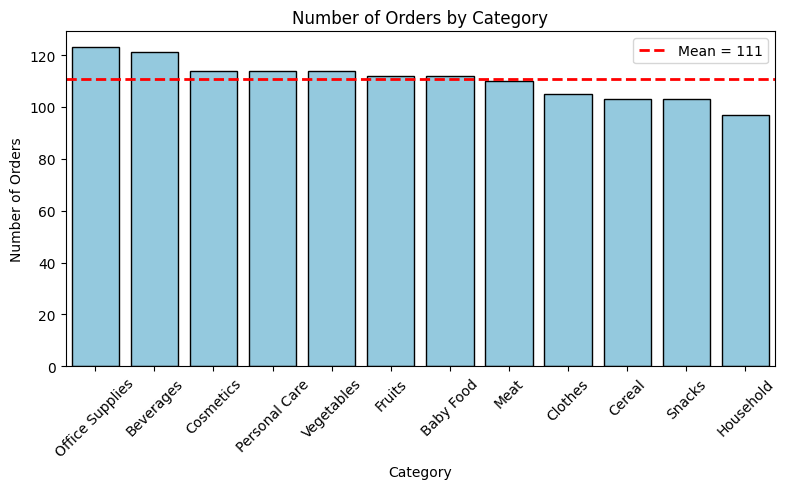

In [ ]:
plt.figure(figsize=(8, 5))

order_counts = df['product_type'].value_counts().sort_values(ascending=False)
mean_orders = order_counts.mean()

sns.barplot(
    x=order_counts.index,
    y=order_counts.values,
    color='skyblue',
    edgecolor='k',
    order=order_counts.index
)

plt.axhline(mean_orders, color='red', linestyle='--', linewidth=2, label=f'Mean = {mean_orders:.0f}')
plt.title('Number of Orders by Category')
plt.xlabel('Category')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


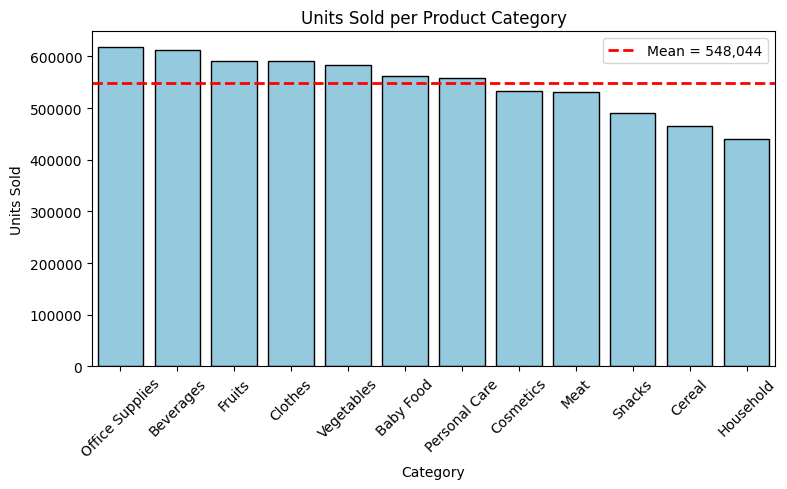

In [ ]:
plt.figure(figsize=(8, 5))

units = df.groupby('product_type')['units_sold'].sum().sort_values(ascending=False)
mean_units = units.mean()

sns.barplot(
    x=units.index,
    y=units.values,
    color='skyblue',
    edgecolor='k',
    order=units.index
)

plt.axhline(mean_units, color='red', linestyle='--', linewidth=2, label=f'Mean = {mean_units:,.0f}')
plt.title('Units Sold per Product Category')
plt.xlabel('Category')
plt.ylabel('Units Sold')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


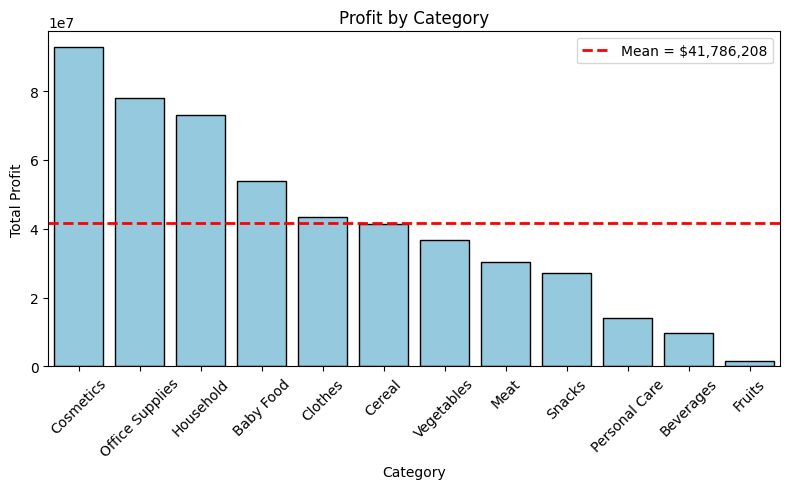

In [ ]:
plt.figure(figsize=(8, 5))

profit = df.groupby('product_type')['total_profit'].sum().sort_values(ascending=False)
mean_profit = profit.mean()

sns.barplot(
    x=profit.index,
    y=profit.values,
    color='skyblue',
    edgecolor='k',
    order=profit.index
)

plt.axhline(mean_profit, color='red', linestyle='--', linewidth=2, label=f'Mean = ${mean_profit:,.0f}')
plt.title('Profit by Category')
plt.xlabel('Category')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


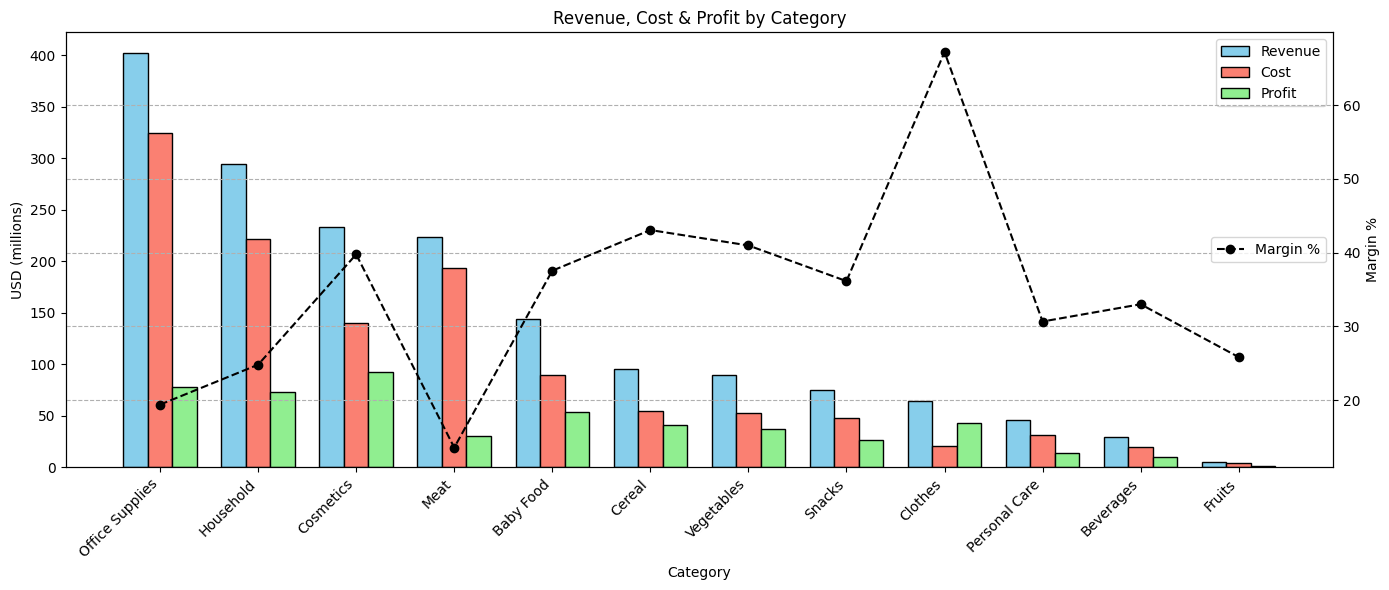

In [ ]:
category_summary['margin_%'] = (category_summary['total_profit'] / category_summary['total_revenue']) * 100
category_summary = category_summary.sort_values('total_revenue', ascending=False)

category_summary['revenue_mln'] = category_summary['total_revenue'] / 1_000_000
category_summary['cost_mln'] = category_summary['total_cost'] / 1_000_000
category_summary['profit_mln'] = category_summary['total_profit'] / 1_000_000

fig, ax1 = plt.subplots(figsize=(14,6))

# bars for revenue, cost, profit
bar_width = 0.25
x = range(len(category_summary))

ax1.bar([p - bar_width for p in x], category_summary['revenue_mln'], width=bar_width, label='Revenue', color='skyblue', edgecolor='k')
ax1.bar(x, category_summary['cost_mln'], width=bar_width, label='Cost', color='salmon', edgecolor='k')
ax1.bar([p + bar_width for p in x], category_summary['profit_mln'], width=bar_width, label='Profit', color='lightgreen', edgecolor='k')

ax1.set_ylabel('USD (millions)')
ax1.set_xlabel('Category')
ax1.set_xticks(x)
ax1.set_xticklabels(category_summary['product_type'], rotation=45, ha='right')
ax1.set_title('Revenue, Cost & Profit by Category')
ax1.legend(loc='upper right')

# margin
ax2 = ax1.twinx()
ax2.plot(x, category_summary['margin_%'], color='k', linestyle='--', marker='o', label='Margin %')
ax2.set_ylabel('Margin %', color='black')
ax2.tick_params(axis='y', labelcolor='black')
ax2.legend(loc='right')
ax2.grid(linestyle='--')
plt.tight_layout()
plt.show()

Revenue
- Office Supplies and Household clearly lead in total revenue
- Cosmetics and Meat also perform well in terms of sales volume

Profit
- Cosmetics stands out with one of the highest profits despite having moderate revenue, indicating strong profitability.

Margin (%)
- Clothes is the clear winner with a margin above 65%
- Cosmetics, Baby Food, Cereal, Vegetables, Snacks also show strong margins (35-45%)
- Meat despite high revenue has a very low margin ~10% indicating inefficiency or high costs

#### Suggested Action
 - Focus on high-margin categories: such as Clothes, Cosmetics, Cereal.
 - Investigate and optimize low-performing segments such as Meat, Fruits, and Beverages.
 - Take advantage of strong sellers such as Office Supplies while keeping an eye on their cost structure.

### Geography

In [ ]:
region_summary = (df
    .groupby('region', observed=True)
    .agg(
    total_revenue=('total_revenue', 'sum'),
    total_cost=('total_cost', 'sum'),
    total_profit=('total_profit', 'sum'),
    total_units_sold=('units_sold', 'sum')
).sort_values(by='total_revenue', ascending=False)
)

region_summary

,total_revenue,total_cost,total_profit,total_units_sold
region,,,,
Europe,1.505653e+09,1.057096e+09,448556800.0,5761244.0
Other,1.031456e+08,7.542022e+07,27725426.0,404853.0
Asia,9.333089e+07,6.817863e+07,25152254.0,410427.0


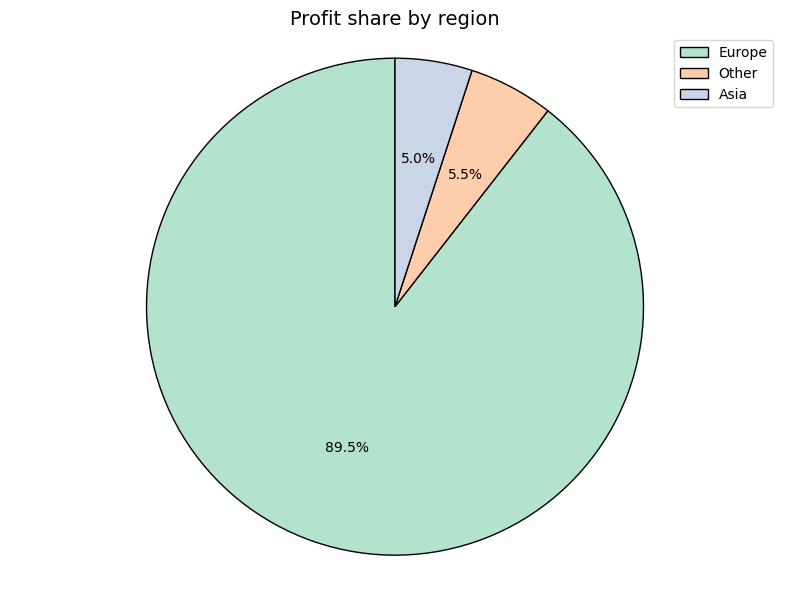

In [ ]:
plt.figure(figsize=(8, 6))
plt.pie(
    region_summary['total_profit'],
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Pastel2.colors,
    wedgeprops={'edgecolor': 'k'}
)

plt.title('Profit share by region', fontsize=14)
plt.axis('equal')
plt.legend(labels=region_summary.index)
plt.tight_layout()
plt.show()

In [ ]:
sub_region_summary = (df
    .groupby('sub-region', observed=True)
    .agg(
    total_revenue=('total_revenue', 'sum'),
    total_cost=('total_cost', 'sum'),
    total_profit=('total_profit', 'sum'),
    total_units_sold=('units_sold', 'sum')
).sort_values(by='total_revenue', ascending=False)
)

sub_region_summary

,total_revenue,total_cost,total_profit,total_units_sold
sub-region,,,,
Southern Europe,562032320.0,395735840.0,166296448.0,2126353.0
Eastern Europe,378686528.0,267413888.0,111272640.0,1349811.0
Northern Europe,296410784.0,205216928.0,91193856.0,1244958.0
Western Europe,268523296.0,188729440.0,79793856.0,1040122.0
Other,103145648.0,75420224.0,27725426.0,404853.0
Western Asia,93330888.0,68178632.0,25152254.0,410427.0


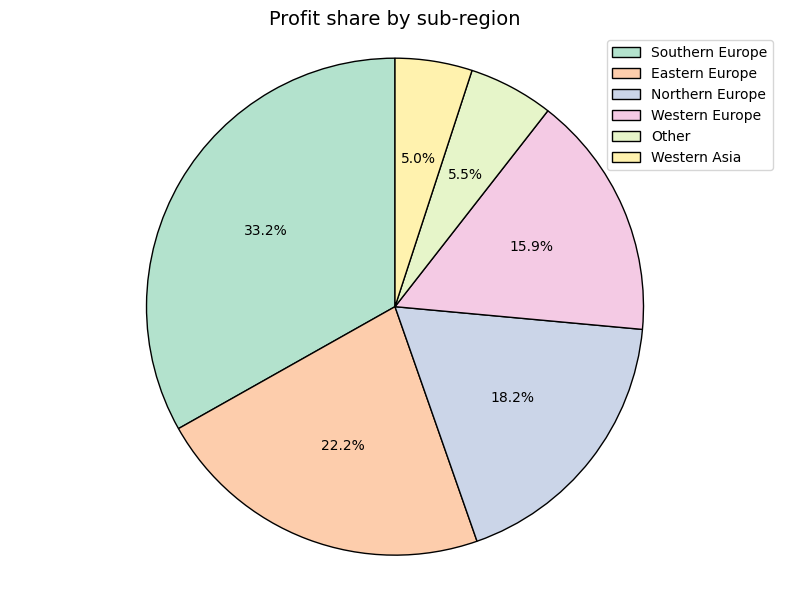

In [ ]:
plt.figure(figsize=(8, 6))
plt.pie(
    sub_region_summary['total_profit'],
    startangle=90,
    autopct='%1.1f%%',
    colors=plt.cm.Pastel2.colors,
    wedgeprops={'edgecolor': 'k'}
)

plt.title('Profit share by sub-region', fontsize=14)
plt.axis('equal')
plt.legend(labels=sub_region_summary.index)
plt.tight_layout()
plt.show()

In [ ]:
country_summary = df[df['country_name'] != 'Other'].groupby('country_name', observed=True).agg(
    total_revenue=('total_revenue', 'sum'),
    total_cost=('total_cost', 'sum'),
    total_profit=('total_profit', 'sum'),
    total_units_sold=('units_sold', 'sum')
).sort_values(by='total_revenue', ascending=False).head(10)

country_summary

,total_revenue,total_cost,total_profit,total_units_sold
country_name,,,,
Czech Republic,53543936.0,39908340.0,13635594.0,142446.0
Ukraine,53252320.0,38447392.0,14804928.0,164577.0
Bosnia and Herzegovina,50117512.0,36859908.0,13257604.0,153545.0
Macedonia,49222088.0,35537984.0,13684101.0,203078.0
San Marino,47883708.0,34090716.0,13792993.0,192228.0
Andorra,47756692.0,32346656.0,15410037.0,185686.0
Portugal,47172192.0,35826784.0,11345408.0,124825.0
Malta,47145320.0,32535194.0,14610129.0,173641.0
Russia,46051660.0,32783978.0,13267683.0,165954.0


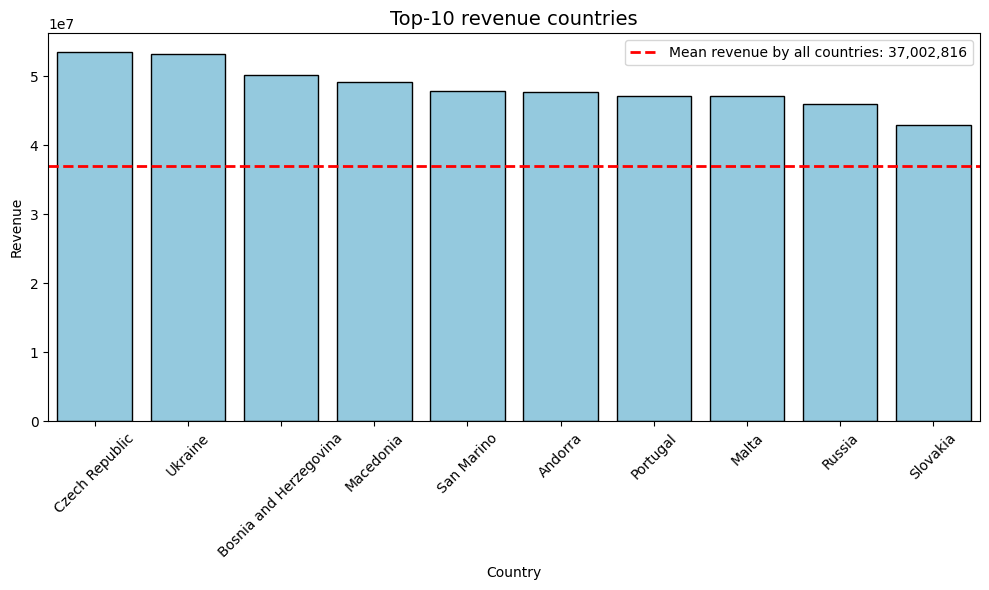

In [ ]:
mean_revenue = df.groupby('country_name')['total_revenue'].sum().mean()

plt.figure(figsize=(10, 6))
sns.barplot(
    x=country_summary.index,
    y=country_summary['total_revenue'],
    color='skyblue',
    edgecolor='k'
)

plt.axhline(mean_revenue, color='red', linestyle='--', linewidth=2, label=f'Mean revenue by all countries: {mean_revenue:,.0f}')

plt.title('Top-10 revenue сountries', fontsize=14)
plt.xlabel('Country')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
top10_profit_countries = (
    df[df['country_name'] != 'Other']
    .groupby('country_name', observed=True)['total_profit']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top10_profit_countries

,total_profit
country_name,
Andorra,15410037.0
Ukraine,14804928.0
Malta,14610129.0
San Marino,13792993.0
Hungary,13786232.0
Macedonia,13684101.0
Czech Republic,13635594.0
Russia,13267683.0
Bosnia and Herzegovina,13257604.0


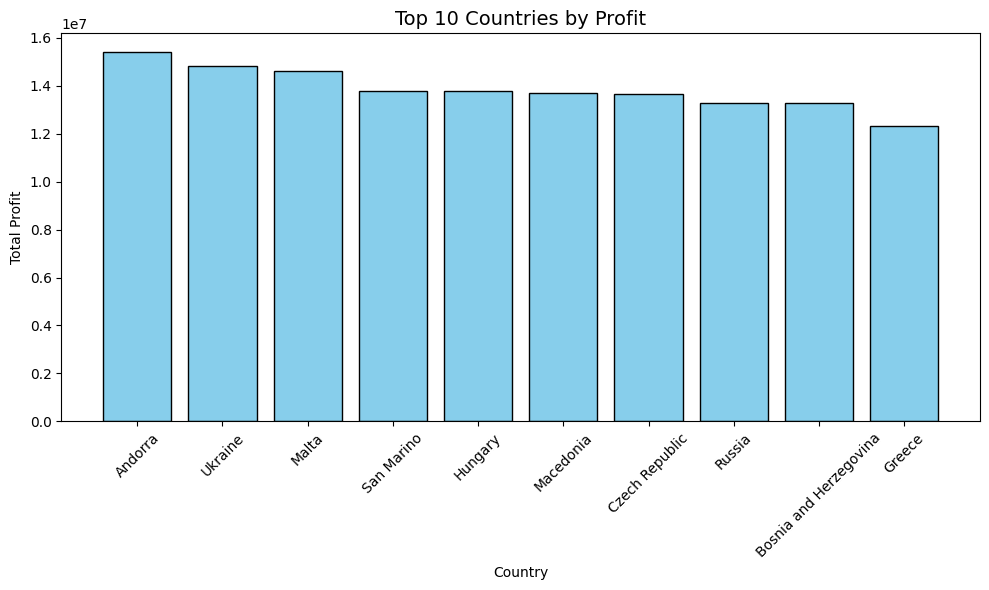

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(top10_profit_countries.index, top10_profit_countries.values, color='skyblue', edgecolor='black')
plt.title('Top 10 Countries by Profit', fontsize=14)
plt.xlabel('Country')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
top_category_per_country = df.groupby(['country_name', 'product_type'])['total_profit'].sum().reset_index()
top_category_per_country = top_category_per_country.sort_values('total_profit', ascending=False).drop_duplicates('country_name')

filtered_data = df.merge(top_category_per_country[['country_name', 'product_type']],
                         on=['country_name', 'product_type'])

sunburst_data = filtered_data.groupby(['region', 'sub-region', 'country_name', 'product_type'], as_index=False)['total_profit'].sum()

fig = px.sunburst(
    sunburst_data,
    path=['region', 'sub-region', 'country_name', 'product_type'],
    values='total_profit',
    title='Popularity of category',
    color='product_type',
    color_discrete_sequence=px.colors.qualitative.Pastel,
    maxdepth=-1
)

fig.update_layout(
    margin=dict(t=30, l=0, r=0, b=0),
    height=700
)
fig.show()

Popular Product Categories
 - Cosmetics, Office Supplies, and Household products dominate.
 - Meat appears in Georgia, suggesting niche or localized demand.
 - Vegetables are present in Spain, while Baby Food shows up in several European countries


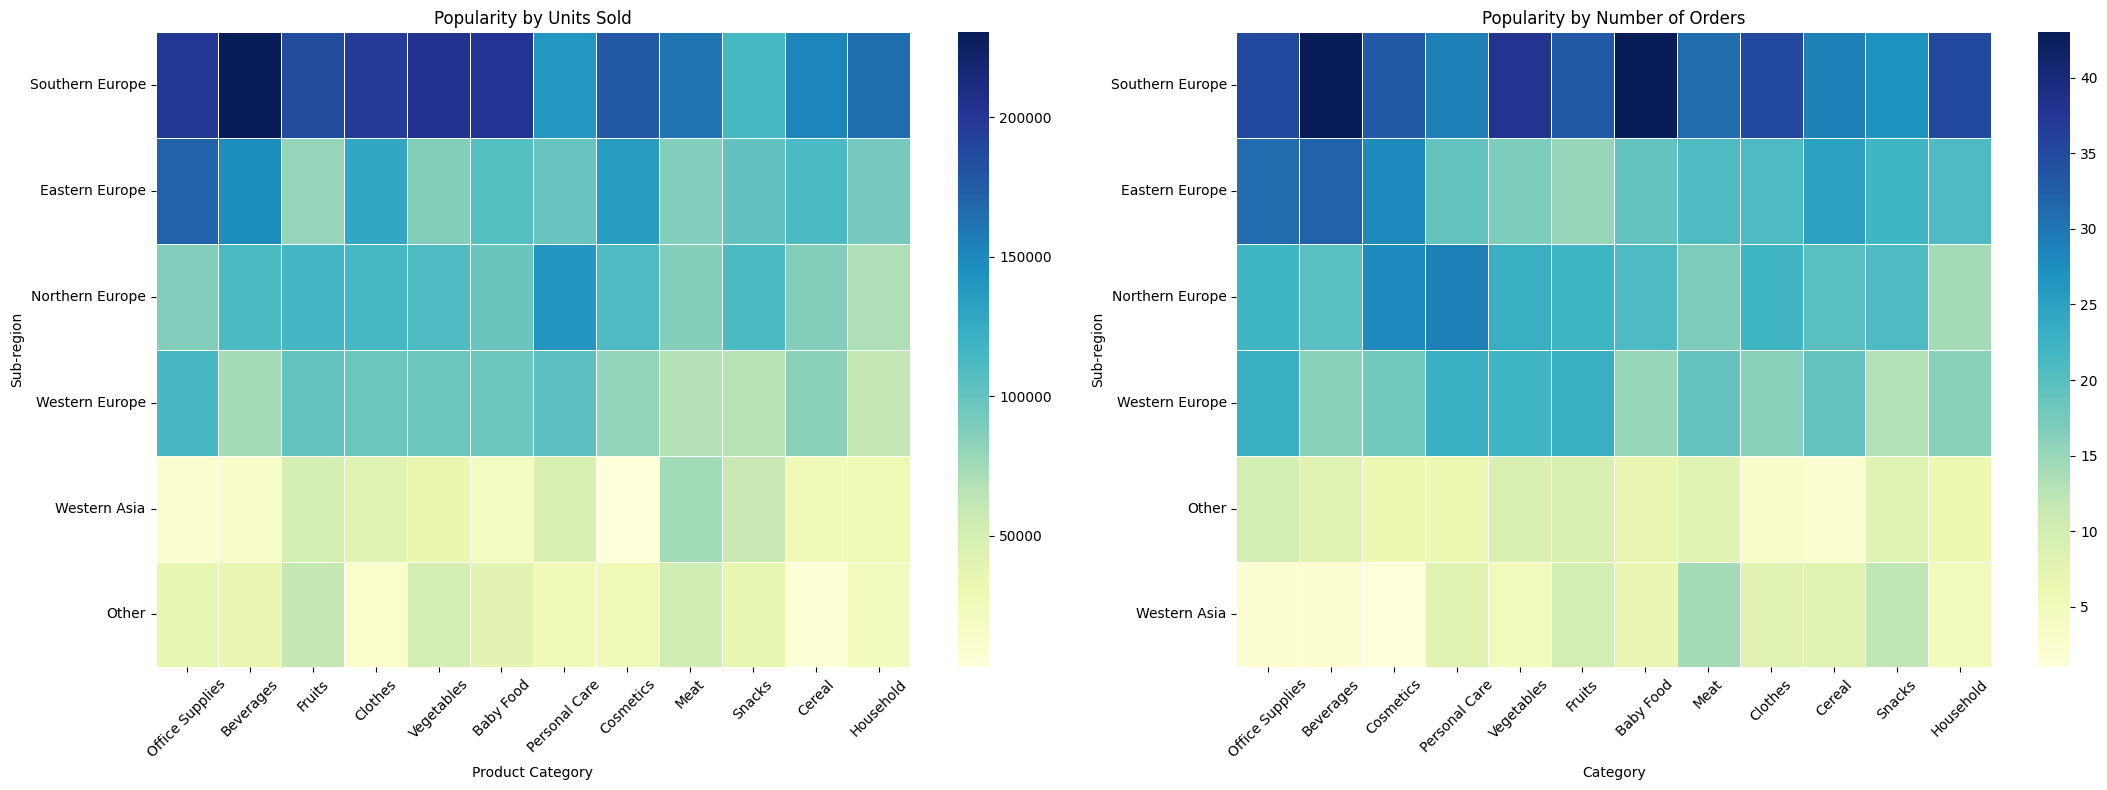

In [ ]:
heatmap_units = df.groupby(['sub-region', 'product_type'])['units_sold'].sum().unstack()

heatmap_units_sorted = heatmap_units.loc[heatmap_units.sum(axis=1).sort_values(ascending=False).index]
heatmap_units_sorted = heatmap_units_sorted[heatmap_units_sorted.sum(axis=0).sort_values(ascending=False).index]

heatmap_orders = df.groupby(['sub-region', 'product_type'])['order_id'].nunique().unstack()

heatmap_orders_sorted = heatmap_orders.loc[heatmap_orders.sum(axis=1).sort_values(ascending=False).index]
heatmap_orders_sorted = heatmap_orders_sorted[heatmap_orders_sorted.sum(axis=0).sort_values(ascending=False).index]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 8))

sns.heatmap(heatmap_units_sorted, cmap="YlGnBu", annot=False, linewidths=.5, ax=ax1)
ax1.set_title('Popularity by Units Sold')
ax1.set_ylabel('Sub-region')
ax1.set_xlabel('Product Category')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

sns.heatmap(heatmap_orders_sorted, cmap="YlGnBu", annot=False, linewidths=.5, ax=ax2)
ax2.set_title('Popularity by Number of Orders')
ax2.set_ylabel('Sub-region')
ax2.set_xlabel('Category')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

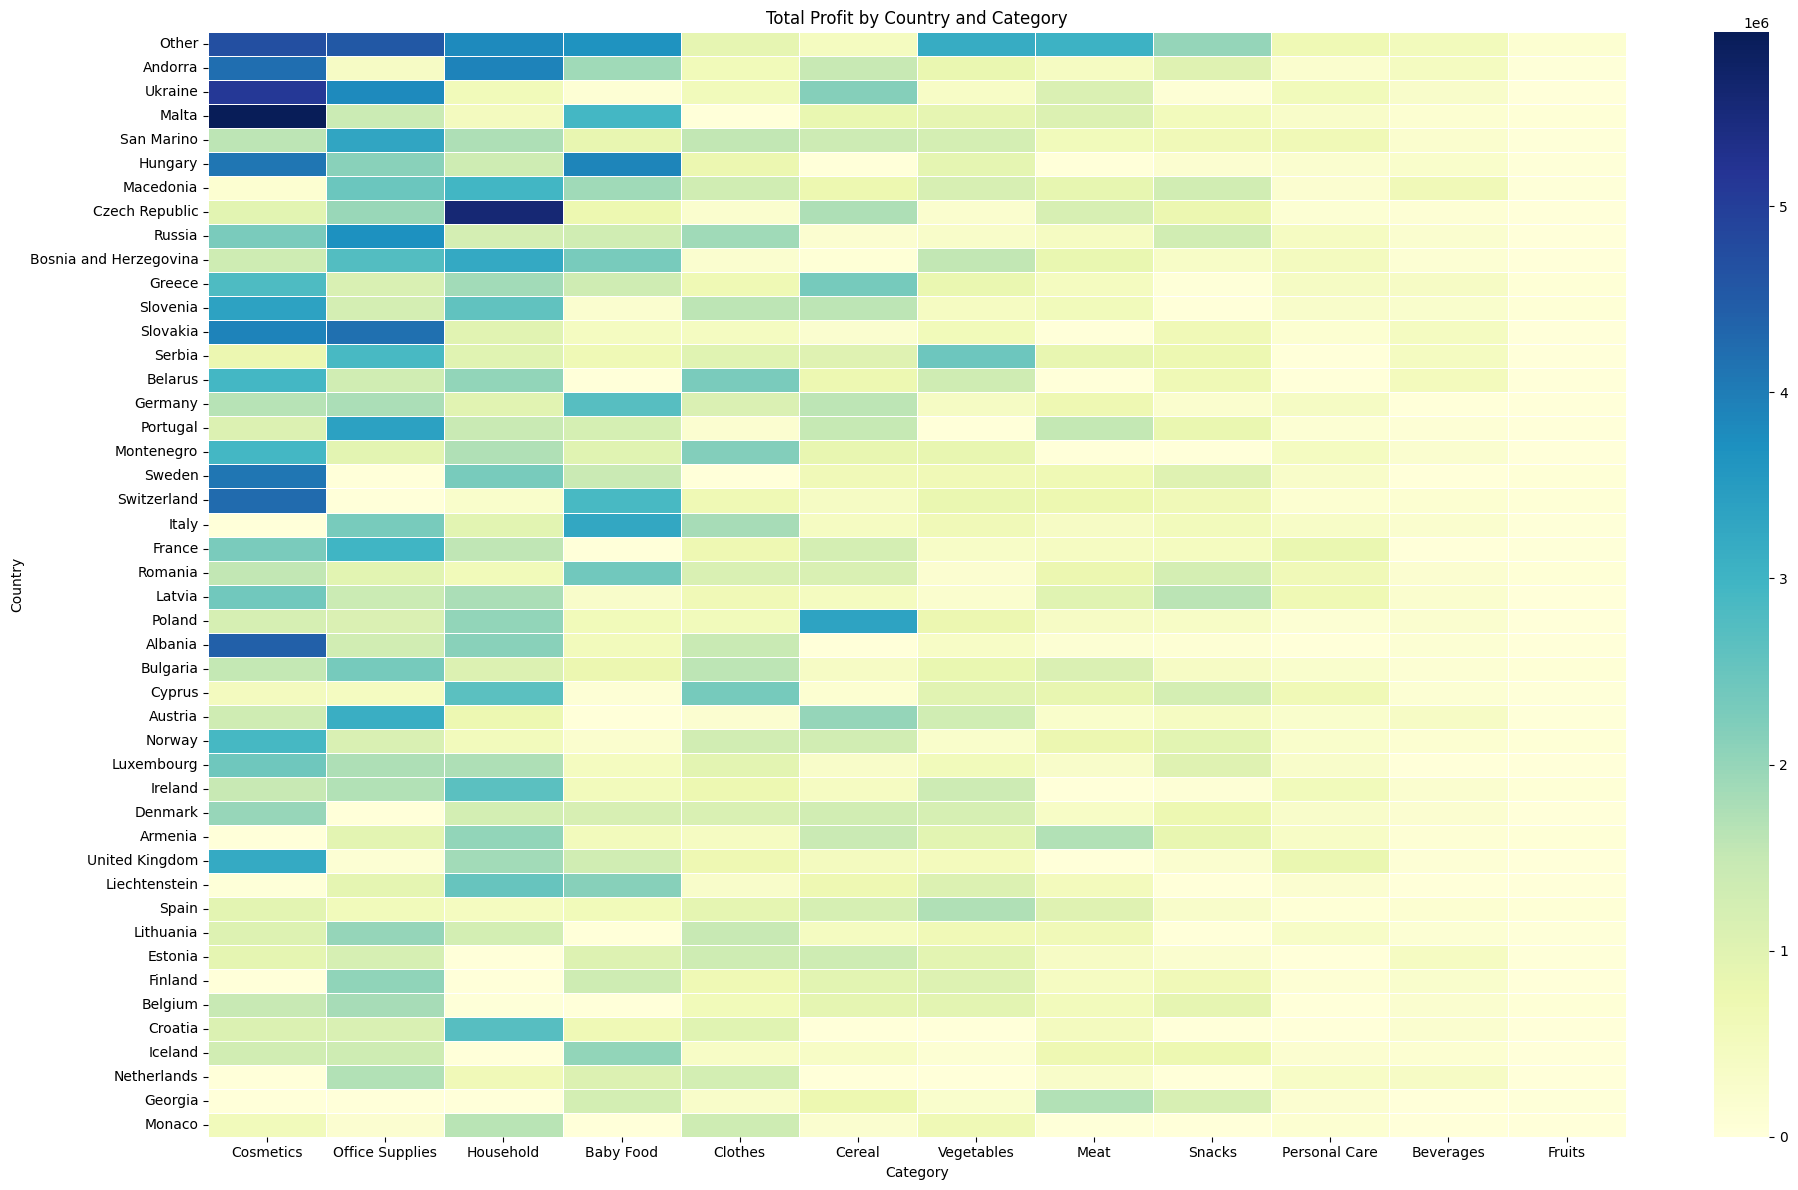

In [ ]:
heatmap_profit = df.groupby(['country_name', 'product_type'])['total_profit'].sum().unstack()

heatmap_profit_sorted = heatmap_profit.loc[heatmap_profit.sum(axis=1).sort_values(ascending=False).index]
heatmap_profit_sorted = heatmap_profit_sorted[heatmap_profit_sorted.sum(axis=0).sort_values(ascending=False).index]

plt.figure(figsize=(20, 12))
sns.heatmap(heatmap_profit_sorted, cmap="YlGnBu", annot=False, linewidths=0.5)
plt.title('Total Profit by Country and Category')
plt.ylabel('Country')
plt.xlabel('Category')
plt.tight_layout()
plt.show()

Region
- Europe dominates the sales landscape, accounting for 89.5% of all transactions.

- Asia contributes 5%, while the remaining 5.5% is from Other regions.

Sub-region
- Southern Europe is the leader, making up 33.2% of European activity.

- Eastern Europe follows with 22.2%, while Northern Europe and Western Europe contribute 18.2% and 15.9% respectively.

- Western Asia and Other regions both show minor participation with 5% each.

These profits suggest strong performance in small Southern and Eastern European countries, especially Andorra, San Marino, and Macedonia.

### Sales Channel

In [ ]:
channel_summary = df.groupby('sales_channel', observed=True).agg(
    total_revenue=('total_revenue', 'sum'),
    total_cost=('total_cost', 'sum'),
    total_profit=('total_profit', 'sum'),
    total_units_sold=('units_sold', 'sum')
).sort_values(by='total_revenue', ascending=False)

channel_summary

,total_revenue,total_cost,total_profit,total_units_sold
sales_channel,,,,
Offline,871760640.0,618294144.0,253466528.0,3320363.0
Online,830368832.0,582400832.0,247967952.0,3256161.0


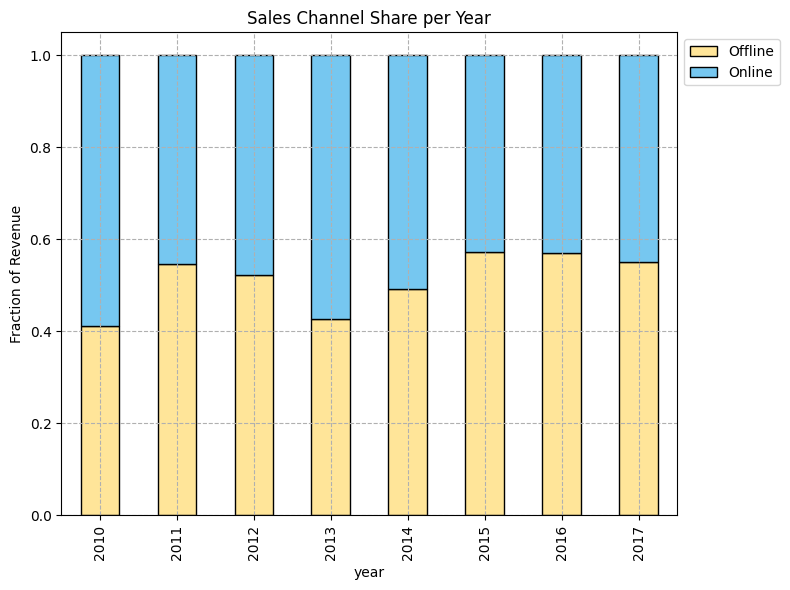

In [ ]:
df['year'] = df['order_date'].dt.year
channel_year = df.groupby(['year','sales_channel'])['total_revenue'].sum().unstack().fillna(0)

channel_pct = channel_year.div(channel_year.sum(axis=1), axis=0)
fig, ax = plt.subplots(figsize=(8,6))
channel_pct.plot(kind='bar', stacked=True, ax=ax, color=['#ffe599','#76c7f0'], edgecolor='k')
ax.set_ylabel('Fraction of Revenue')
ax.set_title('Sales Channel Share per Year')
ax.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.tight_layout()
plt.grid(linestyle='--')
plt.show()

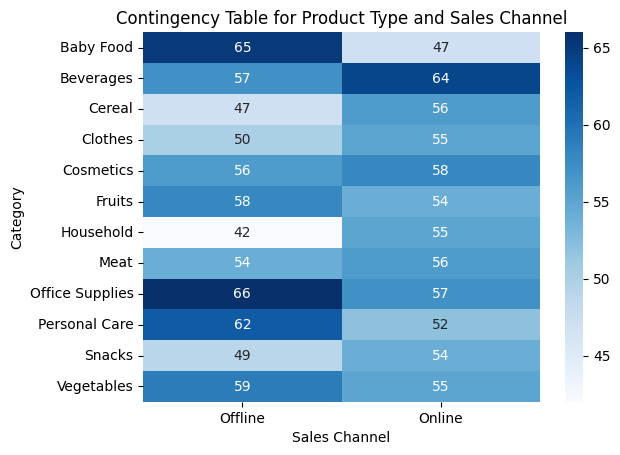

In [ ]:
contingency_table = pd.crosstab(df['product_type'], df['sales_channel'])

sns.heatmap(contingency_table, annot=True, cmap='Blues', fmt='d')
plt.title('Contingency Table for Product Type and Sales Channel')
plt.ylabel('Category')
plt.xlabel('Sales Channel')
plt.show()

In [ ]:
df.groupby(['sales_channel', 'product_type'])['units_sold'].sum().unstack()

product_type,Baby Food,Beverages,Cereal,Clothes,Cosmetics,Fruits,Household,Meat,Office Supplies,Personal Care,Snacks,Vegetables
sales_channel,,,,,,,,,,,,
Offline,334927.0,291836.0,211326.0,298383.0,256198.0,288877.0,190554.0,279177.0,358036.0,293886.0,231597.0,285566.0
Online,227779.0,321297.0,254359.0,293002.0,277093.0,302795.0,249695.0,251203.0,259605.0,263792.0,258563.0,296978.0


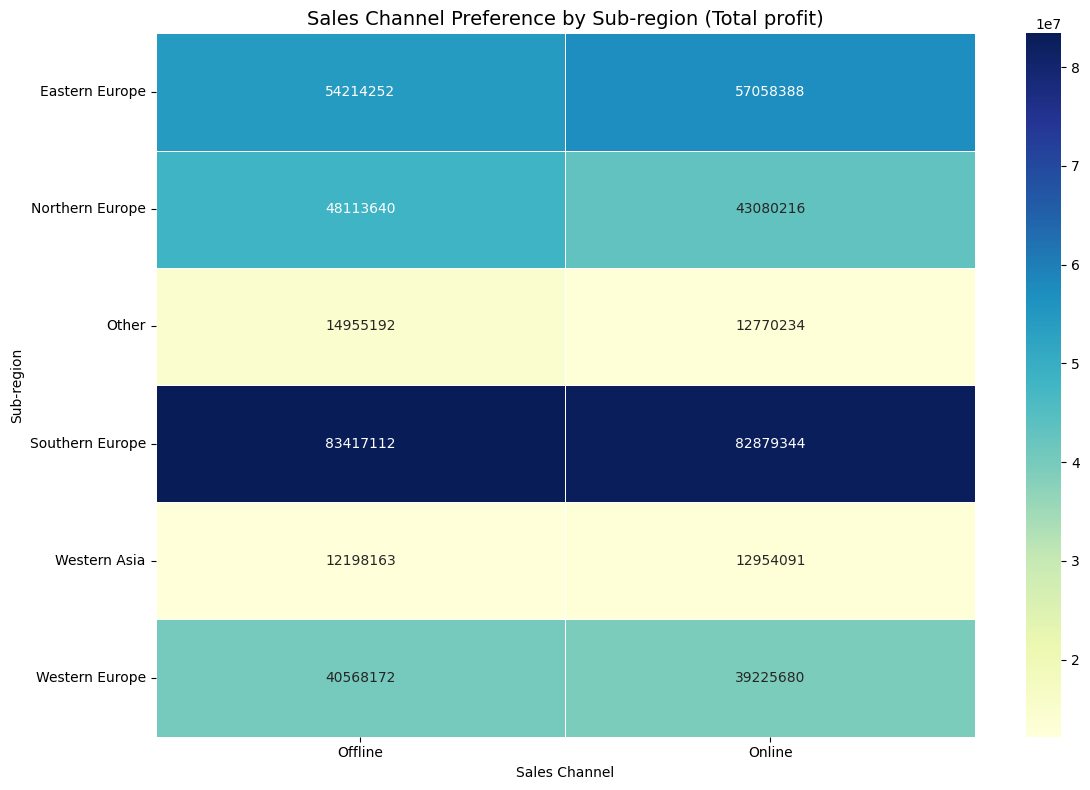

In [ ]:
channel_by_subregion = df.groupby(['sub-region', 'sales_channel'])['total_profit'].sum().unstack()

plt.figure(figsize=(12, 8))
sns.heatmap(channel_by_subregion, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=.5)
plt.title("Sales Channel Preference by Sub-region (Total profit)", fontsize=14)
plt.xlabel("Sales Channel")
plt.ylabel("Sub-region")
plt.tight_layout()
plt.show()

Key takeaways
- Offline channel performs better for Baby Food, Office Supplies.
- Online channel leads in Household, Cerea.
- The close gap across most categories confirms that both channels are well-developed and strategically optimized.

### Order Priority

In [ ]:
shipping_by_priority = df.groupby('order_priority')['shipping_time'].mean().sort_values()
shipping_by_priority

,shipping_time
order_priority,
C,23.718954
H,24.319403
L,25.098802
M,25.861190


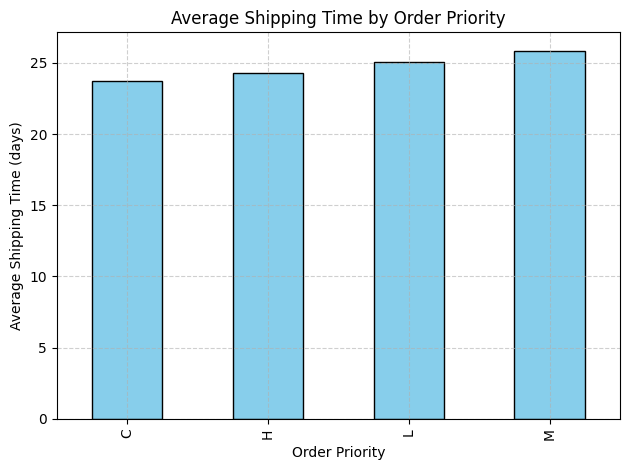

In [ ]:
shipping_by_priority.plot(kind='bar', color='skyblue', edgecolor='k')
plt.title('Average Shipping Time by Order Priority')
plt.xlabel('Order Priority')
plt.ylabel('Average Shipping Time (days)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:
priority_units = df.groupby('order_priority')['units_sold'].mean().sort_values(ascending=False)
priority_units

,units_sold
order_priority,
M,5075.362793
H,4951.450684
C,4943.258301
L,4830.981934


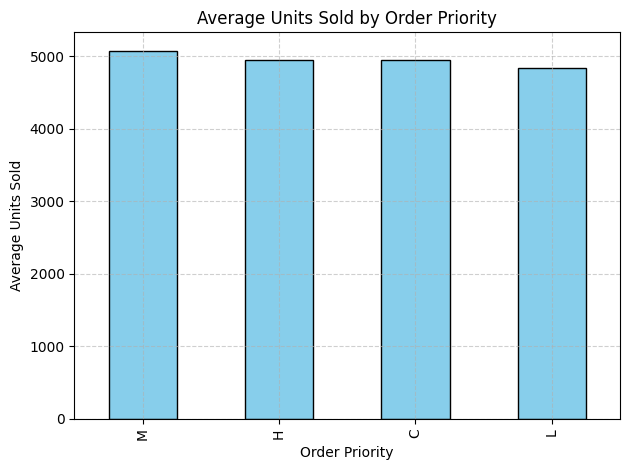

In [ ]:
priority_units.plot(kind='bar', color='skyblue', edgecolor='k')
plt.title('Average Units Sold by Order Priority')
plt.xlabel('Order Priority')
plt.ylabel('Average Units Sold')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:
priority_profit = df.groupby('order_priority')['total_profit'].mean().sort_values(ascending=False)
priority_profit

,total_profit
order_priority,
C,396938.12500
M,387509.71875
H,383001.15625
L,343937.40625


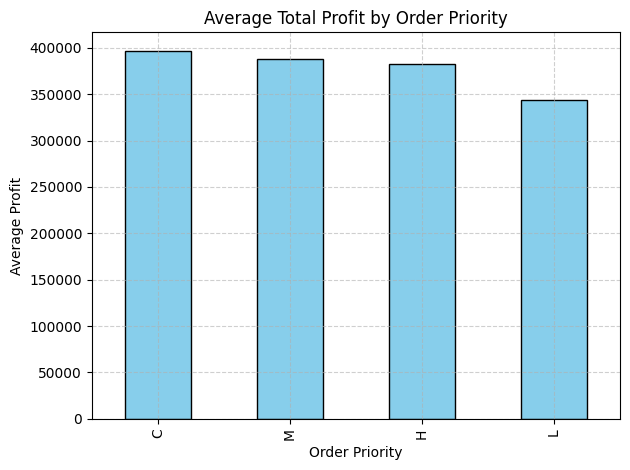

In [ ]:
priority_profit.plot(kind='bar', color='skyblue', edgecolor='k')
plt.title('Average Total Profit by Order Priority')
plt.xlabel('Order Priority')
plt.ylabel('Average Profit')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

df['weekday'] = df['order_date'].dt.dayofweek
priority_by_weekday = df.groupby(['weekday', 'order_priority']).size().unstack(fill_value=0)
priority_pct_by_weekday = priority_by_weekday.div(priority_by_weekday.sum(axis=1), axis=0) * 100

priority_pct_by_weekday.index = [day_names[day] for day in priority_pct_by_weekday.index]

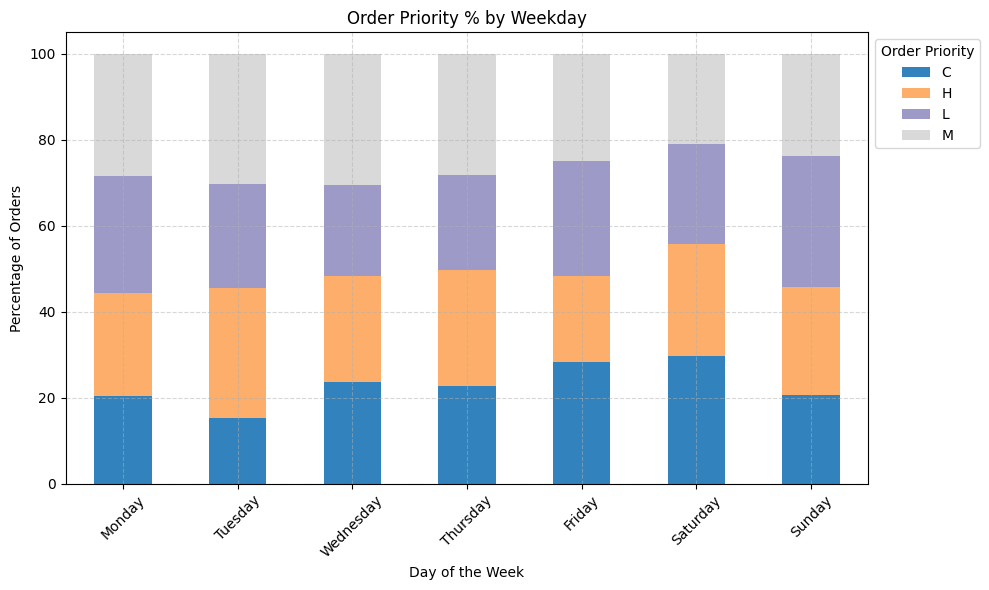

In [ ]:
priority_pct_by_weekday.plot(kind='bar', stacked=True, figsize=(10,6), colormap='tab20c')
plt.title('Order Priority % by Weekday')
plt.ylabel('Percentage of Orders')
plt.xlabel('Day of the Week')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Order Priority', bbox_to_anchor=(1, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Observations:

- Friday and Saturday have the highest volume of Critical (C) priority orders.

- Tuesday and Wednesday are the leading days for Medium (M) priority orders.

- There is a noticeable increase in High (H) priority orders on Tuesday.

Profit Correlation:

- On average, orders with Critical (C) priority generate the highest profit.

This suggests that higher-priority orders tend to be more profitable.

Recommendations for Operational Planning:
Customers placing orders on Friday or Sunday are more likely to experience delays in delivery.

Optimizing resource allocation on weekends (especially Friday and Saturday) could help reduce average shipping times.

Consider increasing warehouse/logistics staff on Friday and Saturday to efficiently handle the peak volume of Critical orders.

### Shipping Time

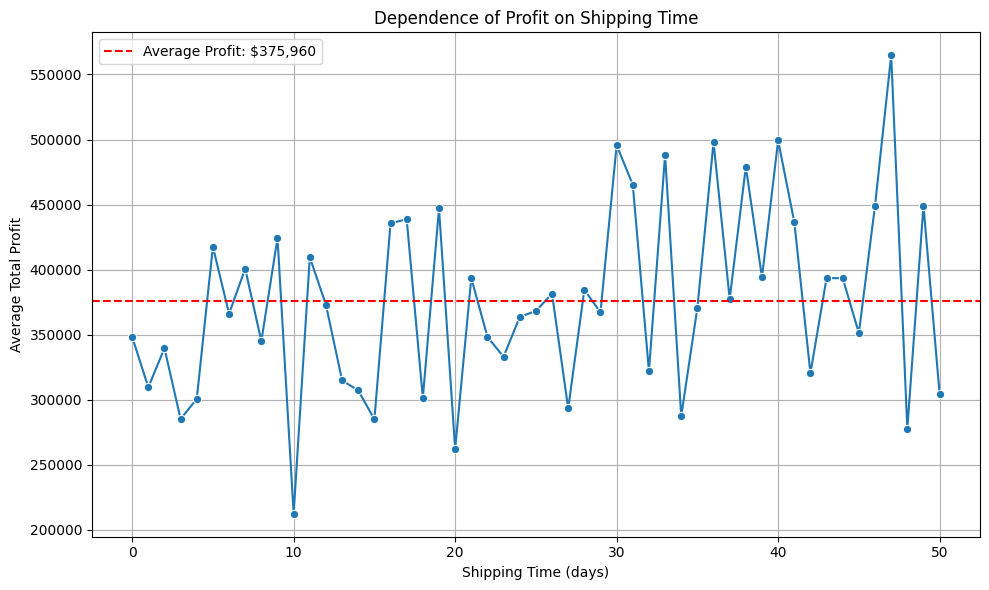

In [ ]:
profit_by_shipping_time = df.groupby('shipping_time', observed=True)['total_profit'].mean().reset_index()

average_profit = profit_by_shipping_time['total_profit'].mean()

plt.figure(figsize=(10, 6))
sns.lineplot(data=profit_by_shipping_time, x='shipping_time', y='total_profit', marker='o')
plt.axhline(y=average_profit, color='r', linestyle='--', label=f'Average Profit: ${average_profit:,.0f}')
plt.title("Dependence of Profit on Shipping Time")
plt.xlabel("Shipping Time (days)")
plt.ylabel("Average Total Profit")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

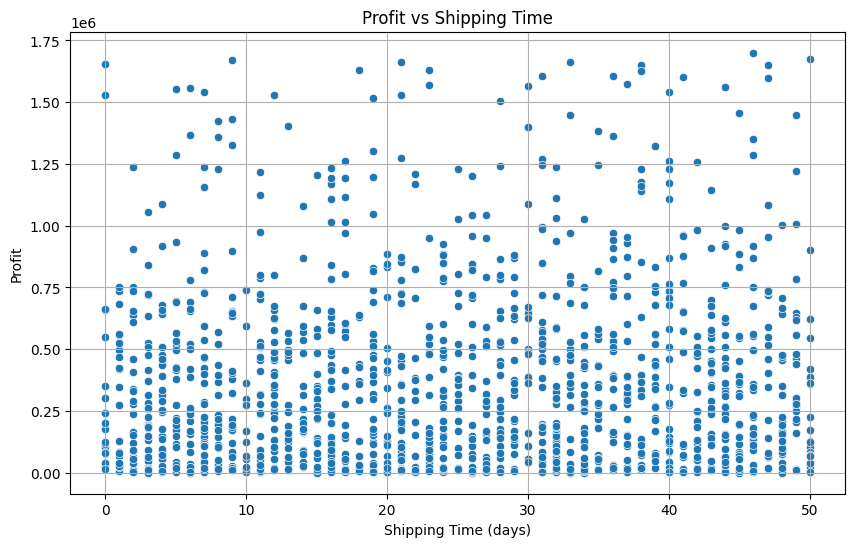

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='shipping_time', y='total_profit')
plt.title("Profit vs Shipping Time")
plt.xlabel("Shipping Time (days)")
plt.ylabel("Profit")
plt.grid(True)
plt.show()

In [ ]:
correlation = df['shipping_time'].corr(df['total_profit'])
print(f"Correlation between shipping time and total profit: {correlation:.2f}")

Correlation between shipping time and total profit: 0.06


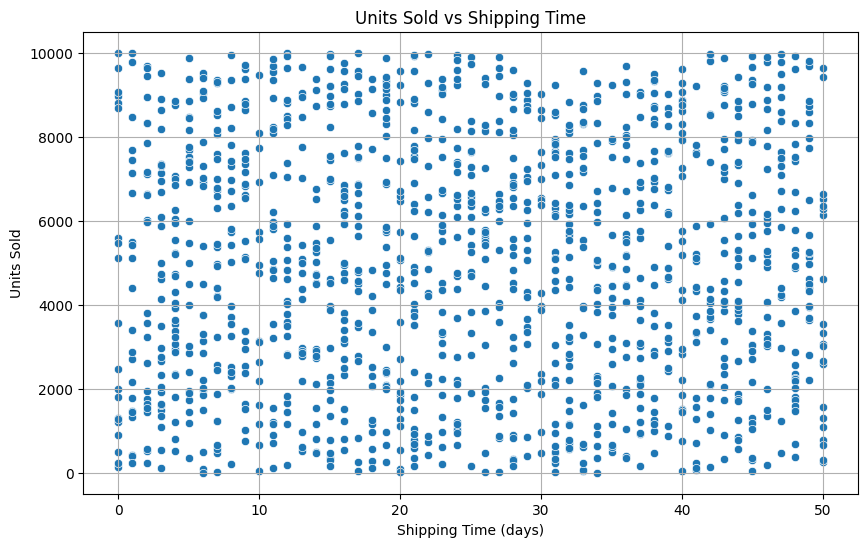

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='shipping_time', y='units_sold')
plt.title("Units Sold vs Shipping Time")
plt.xlabel("Shipping Time (days)")
plt.ylabel("Units Sold")
plt.grid(True)
plt.show()

In [ ]:
correlation = df['shipping_time'].corr(df['units_sold'])
print(f"Correlation between shipping time and units sold: {correlation:.2f}")

Correlation between shipping time and units sold: 0.01


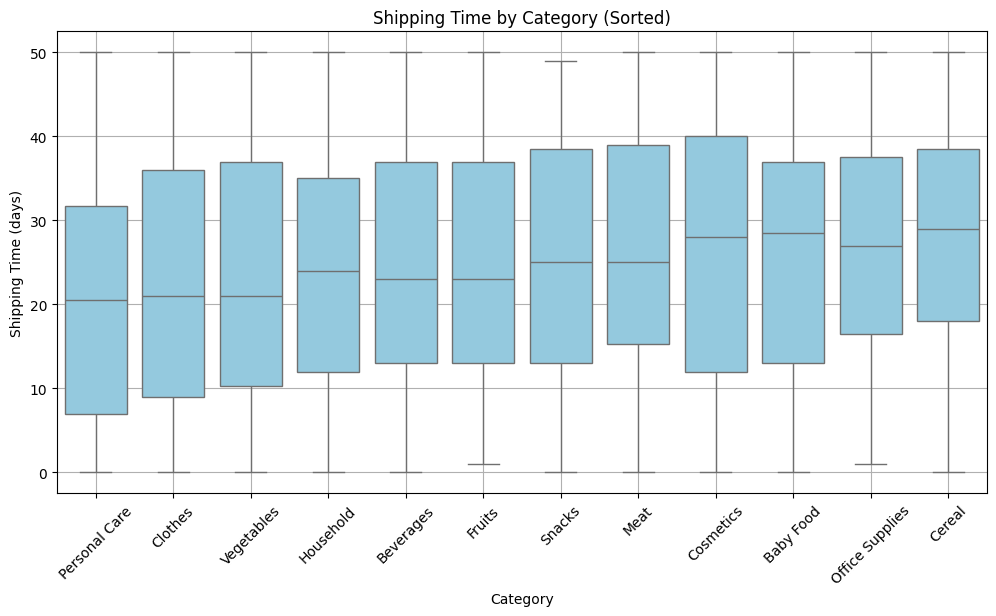

In [ ]:
category_shipping_time = df.groupby('product_type')['shipping_time'].mean().sort_values()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='product_type', y='shipping_time', order=category_shipping_time.index, color='skyblue')
plt.title("Shipping Time by Category (Sorted)")
plt.xlabel("Category")
plt.ylabel("Shipping Time (days)")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [ ]:
shipping_time_product = df.groupby('product_type')['shipping_time'].mean().sort_values(ascending=False)
shipping_time_product

,shipping_time
product_type,
Cereal,27.184466
Office Supplies,26.707317
Baby Food,26.339286
Cosmetics,25.912281
Meat,25.909091
Snacks,25.543689
Fruits,24.419643
Beverages,24.123967
Household,23.938144


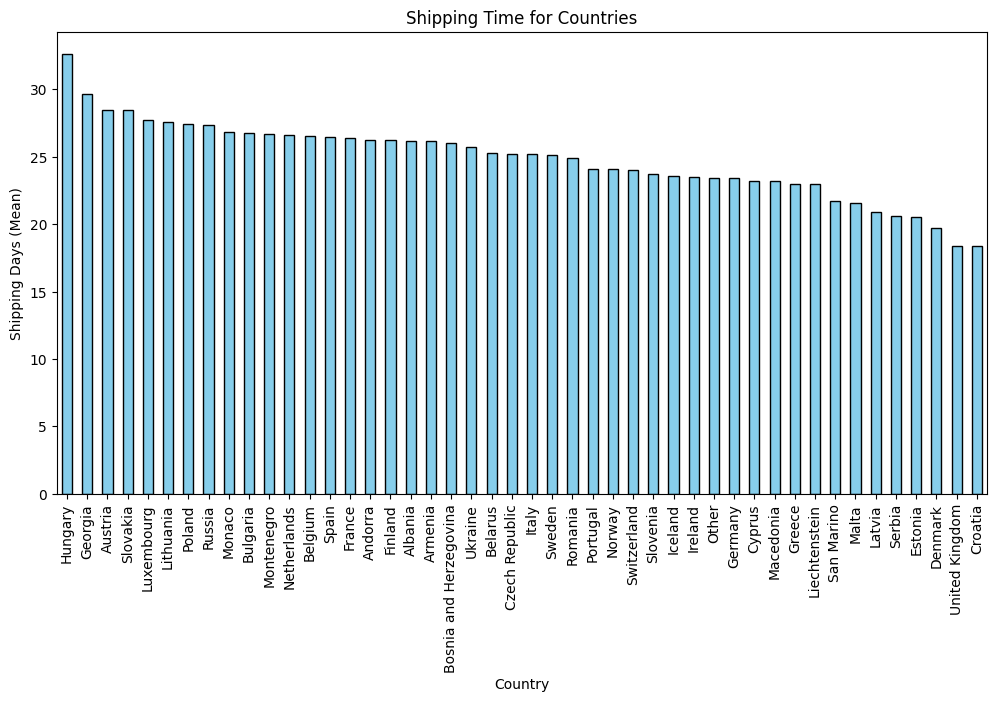

In [ ]:
time_shipping_country = df.groupby("country_name")["shipping_time"].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
ax = time_shipping_country.plot(kind='bar', color='skyblue', edgecolor='k')
ax.set_title("Shipping Time for Countries")
plt.xlabel("Country")
ax.set_ylabel("Shipping Days (Mean)")
plt.xticks(rotation=90)
plt.yticks()
plt.show()

An analysis of the shipping time reveals that certain product categories are shipped significantly faster than others. In particular:
- Personal Care
- Clothes
- Vegetables

Countries such as Croatia, the United Kingdom, Estonia, Serbia, and Denmark demonstrate the fastest shipping times. This suggests more efficient logistics systems, either due to proximity to distribution centers or well-established domestic delivery services.

Some product categories such as Cereal and Office Supplies show relatively slower shipping times and may require further optimization in supply chain processes.

Interestingly, there is no clear correlation between shipping time and total profit — increased profit does not correlate with longer or shorter shipping times, contradicting any direct dependency.

### Dynamic

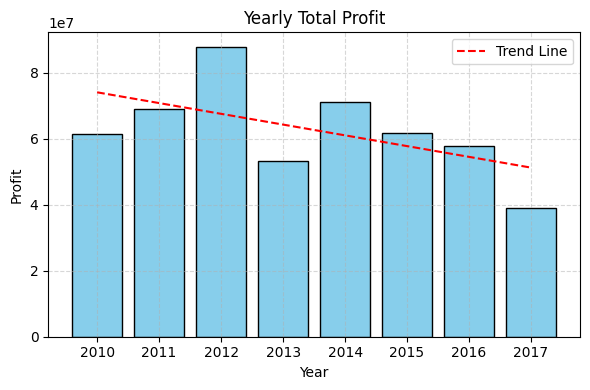

In [ ]:
yearly_sales = df.groupby(df['order_date'].dt.year)['total_profit'].sum()

plt.figure(figsize=(6, 4))
bars = plt.bar(yearly_sales.index, yearly_sales.values, color='skyblue', edgecolor='k')

x = np.array(yearly_sales.index)
y = np.array(yearly_sales.values)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)

plt.plot(x, p(x), color='red', linestyle='--', label='Trend Line')
plt.title('Yearly Total Profit')
plt.xlabel('Year')
plt.ylabel('Profit')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.legend()
plt.show()

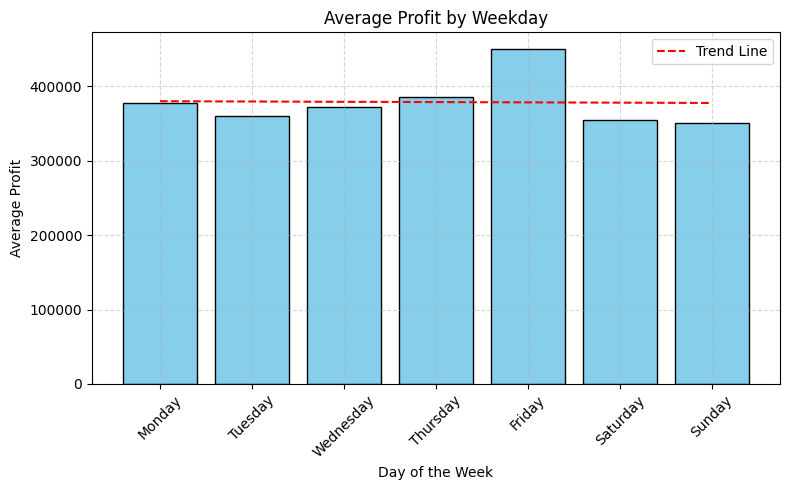

In [ ]:
df['weekday'] = df['order_date'].dt.day_name()

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_profit = df.groupby('weekday')['total_profit'].mean().reindex(weekday_order)

plt.figure(figsize=(8, 5))
x = np.arange(len(weekday_profit))
y = weekday_profit.values
plt.bar(x, y, color='skyblue', edgecolor='black')

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), color='red', linestyle='--', label='Trend Line')

plt.title('Average Profit by Weekday')
plt.ylabel('Average Profit')
plt.xlabel('Day of the Week')
plt.xticks(ticks=x, labels=weekday_profit.index, rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

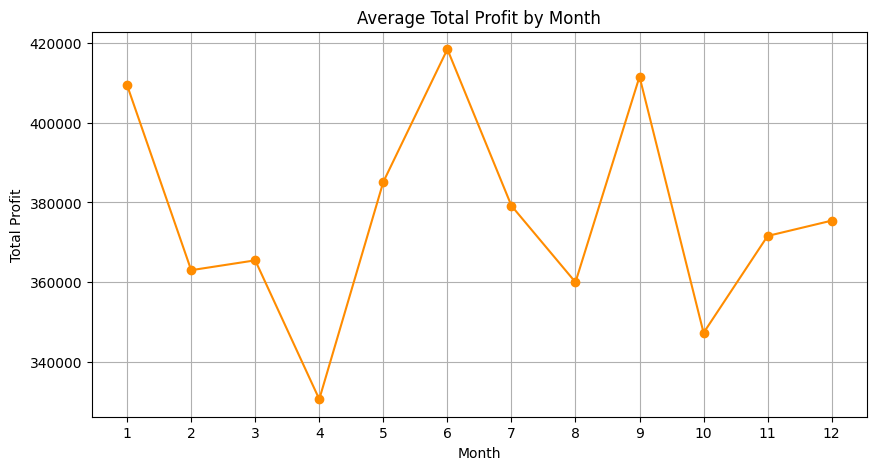

In [ ]:
df['month'] = df['order_date'].dt.month
monthly_trend = df.groupby('month')['total_profit'].mean()

plt.figure(figsize=(10, 5))
monthly_trend.plot(marker='o', color='darkorange')
plt.title("Average Total Profit by Month")
plt.xlabel("Month")
plt.ylabel("Total Profit")
plt.grid(True)
plt.xticks(range(1,13))
plt.show()

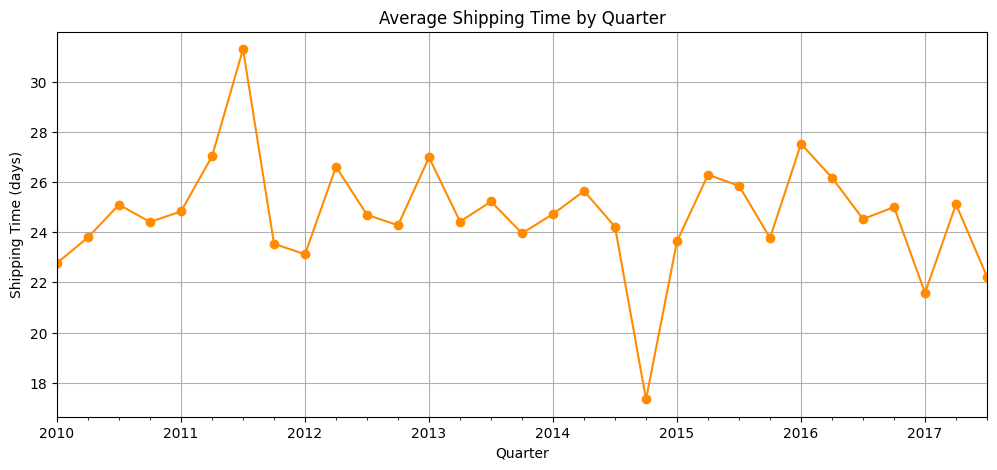

In [ ]:
df['quarter'] = df['order_date'].dt.to_period("Q")
quarterly_trend = df.groupby('quarter')['shipping_time'].mean()

plt.figure(figsize=(12, 5))
quarterly_trend.plot(marker='o', color='darkorange')
plt.title("Average Shipping Time by Quarter")
plt.xlabel("Quarter")
plt.ylabel("Shipping Time (days)")
plt.grid(True)
plt.show()

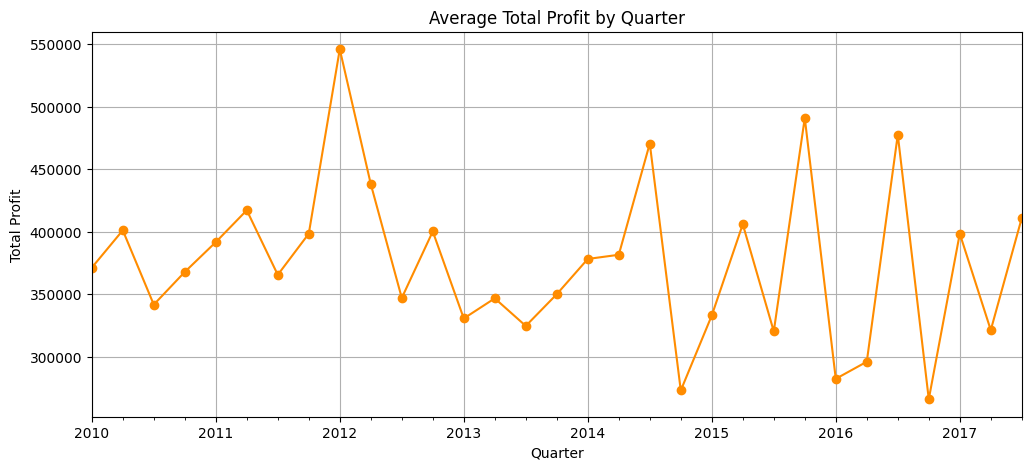

In [ ]:
df['quarter'] = df['order_date'].dt.to_period("Q")
quarterly_trend = df.groupby('quarter')['total_profit'].mean()

plt.figure(figsize=(12, 5))
quarterly_trend.plot(marker='o', color='darkorange')
plt.title("Average Total Profit by Quarter")
plt.xlabel("Quarter")
plt.ylabel("Total Profit")
plt.grid(True)
plt.show()

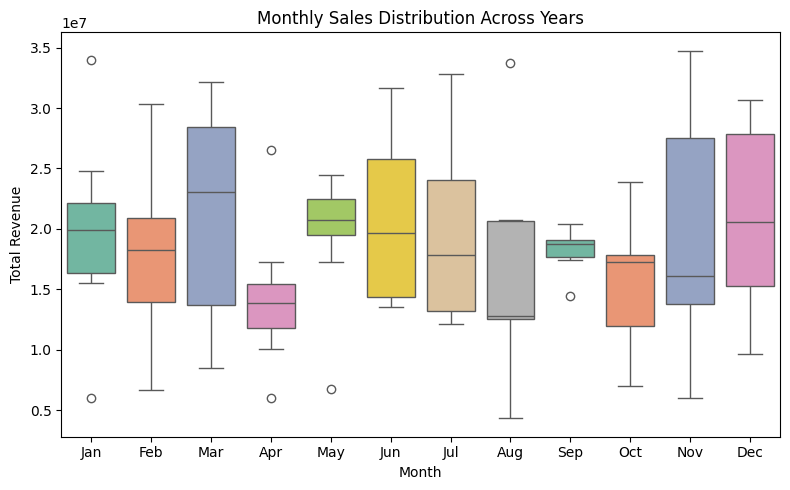

In [ ]:
monthly_sales = df.groupby(pd.Grouper(key='order_date', freq='M'))['total_revenue'].sum().reset_index()
monthly_sales['month_name'] = monthly_sales['order_date'].dt.strftime('%b')
plt.figure(figsize=(8,5))
sns.boxplot(x='month_name', y='total_revenue',
            order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
            data=monthly_sales, palette='Set2')
plt.title('Monthly Sales Distribution Across Years')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.tight_layout()
plt.show()

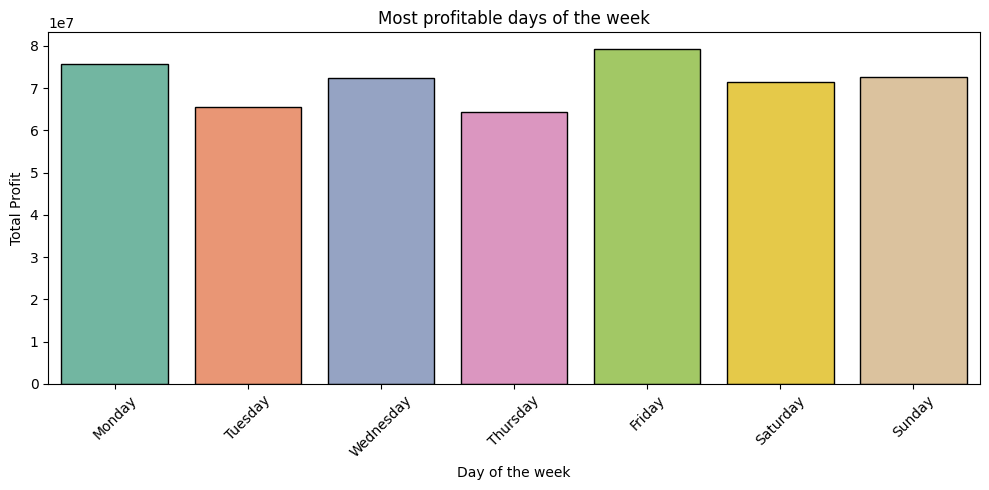

In [ ]:
df['weekday'] = df['order_date'].dt.weekday
df['weekday_name'] = df['order_date'].dt.day_name()

weekday_sales = df.groupby(['weekday', 'weekday_name'])['total_profit'].sum().reset_index()

weekday_sales = weekday_sales.sort_values('weekday')

plt.figure(figsize=(10, 5))
sns.barplot(data=weekday_sales, x='weekday_name', y='total_profit', palette='Set2', edgecolor='k')
plt.title('Most profitable days of the week')
plt.xlabel('Day of the week')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

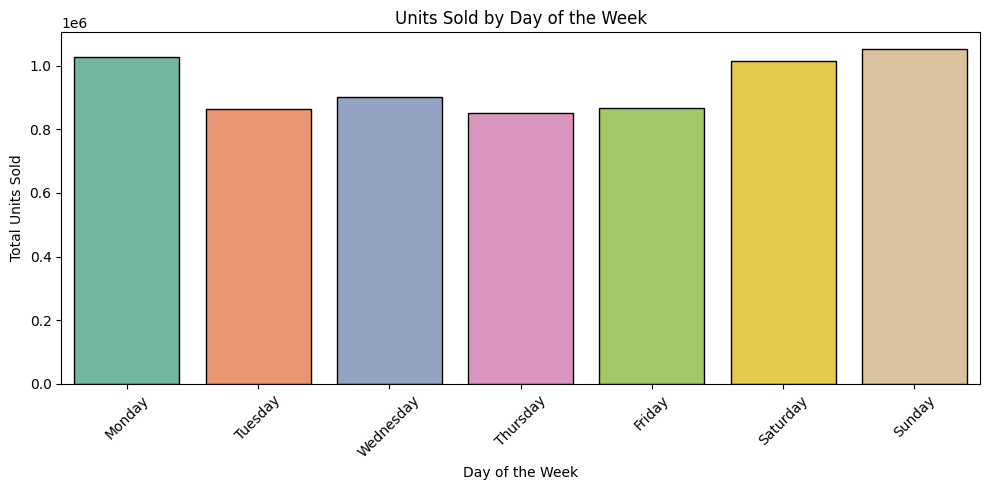

In [ ]:
weekday_units = df.groupby(['weekday', 'weekday_name'])['units_sold'].sum().reset_index()
weekday_units = weekday_units.sort_values('weekday')

plt.figure(figsize=(10, 5))
sns.barplot(data=weekday_units, x='weekday_name', y='units_sold', palette='Set2', edgecolor='k')
plt.title('Units Sold by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Units Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
df['weekday'] = df['order_date'].dt.dayofweek
df['weekday_name'] = df['order_date'].dt.day_name()

grouped = df.groupby(['weekday', 'weekday_name', 'product_type'])['total_revenue'].sum().reset_index()

top3_per_day = (
    grouped.sort_values(['weekday', 'total_revenue'], ascending=[True, False])
    .groupby('weekday')
    .head(3)
)

top3_per_day[['weekday_name', 'product_type', 'total_revenue']]

,weekday_name,product_type,total_revenue
18,Monday,Household,72058888.0
20,Monday,Office Supplies,61175320.0
19,Monday,Meat,42352696.0
152,Tuesday,Office Supplies,49799984.0
151,Tuesday,Meat,36491800.0
148,Tuesday,Cosmetics,35592016.0
246,Wednesday,Household,63859880.0
248,Wednesday,Office Supplies,60955864.0
247,Wednesday,Meat,37645668.0
308,Thursday,Office Supplies,52367052.0


Overall Sales Dynamics

- 2017: Gradual growth observed in the first half, but data is incomplete.
- Highest revenue months: January, September, November.
- Likely driven by seasonal demand, holidays, and marketing campaigns.
- Friday, Monday generates the highest profit.
- Weekends have the most orders, but not the highest revenue.
- In Q4 2014, there was an unusually fast shipping time.
- This correlated with lower profits, which is counterintuitive.
- Office Supplies dominates every day of the week — always in the top 3, often #1.
- Household products are particularly strong on Monday, Wednesday, and Friday.
- Cosmetics are most profitable midweek (Tuesday, Thursday, Friday).
- Meat appears consistently early in the week (Monday–Wednesday).



## Summary

---



1. Profit Drivers
 - Office Supplies, Household - consistently high revenue
 - Cosmetics, Meat - string volume, but Meat has low profir margin

2. High Margin
 - Clothes 60+%, Cosmetics, Cereal, Vegetables
 - Focus on scaling these

3. Low Efficiency Categories:
 - Meat, Fruitsm Beverages - need cost or price optimization

4. Geographic Insights
 - Europe dominates (89,5% of sales)
 - Southern Europe leads (33.2%), followed by Eastern (22.2%)
 - Small countries (e.g., Andorra, San Marino) show high profitability

5. Sales Channel
 - Offline: Best for Baby Food, Office Supplies
 - Online: Strong in Household, Cereal
 - Both channels are strategically optimized

6. Logistics
 - Fastest shipping: Personal Care, Clothes, Vegetables
 - Slowest: Cereal, Office Supplies — may need supply chain improvement
 - No strong correlation between shipping time and profit
 - Efficient Countries: Croatia, UK, Estonia, Serbia, Denmark

7. Temporal Patterns
 - Best sales days: Friday and Monday (highest profit)
 - Most orders: On weekends — but lower revenue
 - Critical Priority Orders: Highest on Friday & Saturday → highest profits
 - Shipping delays: More likely on Friday & Sunday

### Strategic Recommendations


1. Focus growth on high-margin produts
 - Increase the amount spent on marketing for these products to maximize profits.

2. Optimize low-perfomance segments
 - Meat, Fruits, and Beverages have low margins despite good, revenue - investigate supply inefficiencies and reduce production or logistics costs.

3. Enhance logistics on weekends
 - Improve customer satisfaction by increasing warehouse/logistics capacity during weekends to avoid bottlenecks.

4. Regional Expansion Strategy
 - Target growth in the America and Asia
 - Begin with urban, high-income regions in North America and Southeast Asia for a quick emergence.

5. Advertising Timing Strategy
 - Launch flash deals or limited-time offers on Monday & Friday, and retargeting or loyalty campaigns midweek.

6. Additional Strategic Ideas
 - Consider introducing subscription models for high-repeat categories.